# Home credit default risk-Kaggle Challenge

## Importing key libraries

In [29]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
#For processing data 
import pandas as pd
import numpy as np
import sklearn
# File system manangement
import os
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
#For visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1-Getting to know data

In [31]:
# Loading data
app_train = pd.read_csv('train_clean.csv')
app_train.shape

(307511, 172)

In [32]:
app_train.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,1
1,1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,0
2,2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
app_train = app_train.drop('Unnamed: 0', axis=1)

In [34]:
# Testing data features
app_test = pd.read_csv('test_clean.csv')
app_test.shape

(48744, 171)

In [35]:
app_test.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,100001,0,0,1,0,135000.0,568800.0,20560.5,4.500000e+05,...,0,0,0,0,0,0,1,0,1,0
1,1,100005,0,0,1,0,99000.0,222768.0,17370.0,1.800000e+05,...,0,0,0,0,0,0,0,0,0,0
2,2,100013,0,1,1,0,202500.0,663264.0,69777.0,6.300000e+05,...,0,0,0,0,0,0,0,0,0,0
3,3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1.472749e+06,...,0,0,0,0,0,1,0,0,1,0
4,4,100038,0,1,0,1,180000.0,625500.0,32067.0,6.255000e+05,...,0,0,0,0,0,0,0,0,0,0


In [36]:
app_test = app_test.drop('Unnamed: 0', axis=1)

In [37]:
print('app_train shape: ', app_train.shape)
print('app_test shape: ', app_test.shape)

app_train shape:  (307511, 171)
app_test shape:  (48744, 170)


## a) Dependent  Variable

The TARGET variable of the test set was hidden to evaluate the model built from train practice. The number of observations of train is about 6 times larger than that of train.

In [38]:
app_train['TARGET'][0:5]

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [39]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

**0 (will repay loan on time i.e loan repayers), 1 (will have difficulty repaying loan i.e loan defaulters). In other words, 0 shows "Rapid" and 1 shows "Not Rapid" classes. These are samples with imbalance which might create biaseness in results. We need to meet this challenge.<br> when we get into problems with inbalanced classes , accuracy is not the best metric. We will come to that later**

0    282686
1     24825
Name: TARGET, dtype: int64


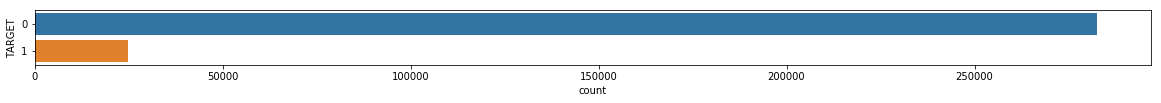

In [40]:
# How many people have difficulty in repaying
fig = plt.figure(figsize=(20,1))
sns.countplot(y='TARGET', data=app_train);
print(app_train.TARGET.value_counts())

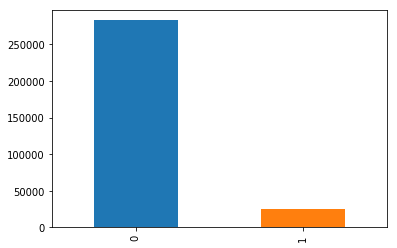

In [41]:
app_train['TARGET'].value_counts().plot.bar()

In [42]:
n_group = app_train['TARGET'].value_counts()
n_group_sum = n_group.sum()

print('Loan repayers: {}'.format(n_group[0]))
print('Loan defaulters: {}'.format(n_group[1]))

print('Loan repayers: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('Loan defaulters: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

Loan repayers: 282686
Loan defaulters: 24825
Loan repayers: 91.93 %
Loan defaulters: 8.07 %


# 2) Checking missing values
We already know our dependent variable has zero missing values as 282686+24825=307511. But we need to check other features

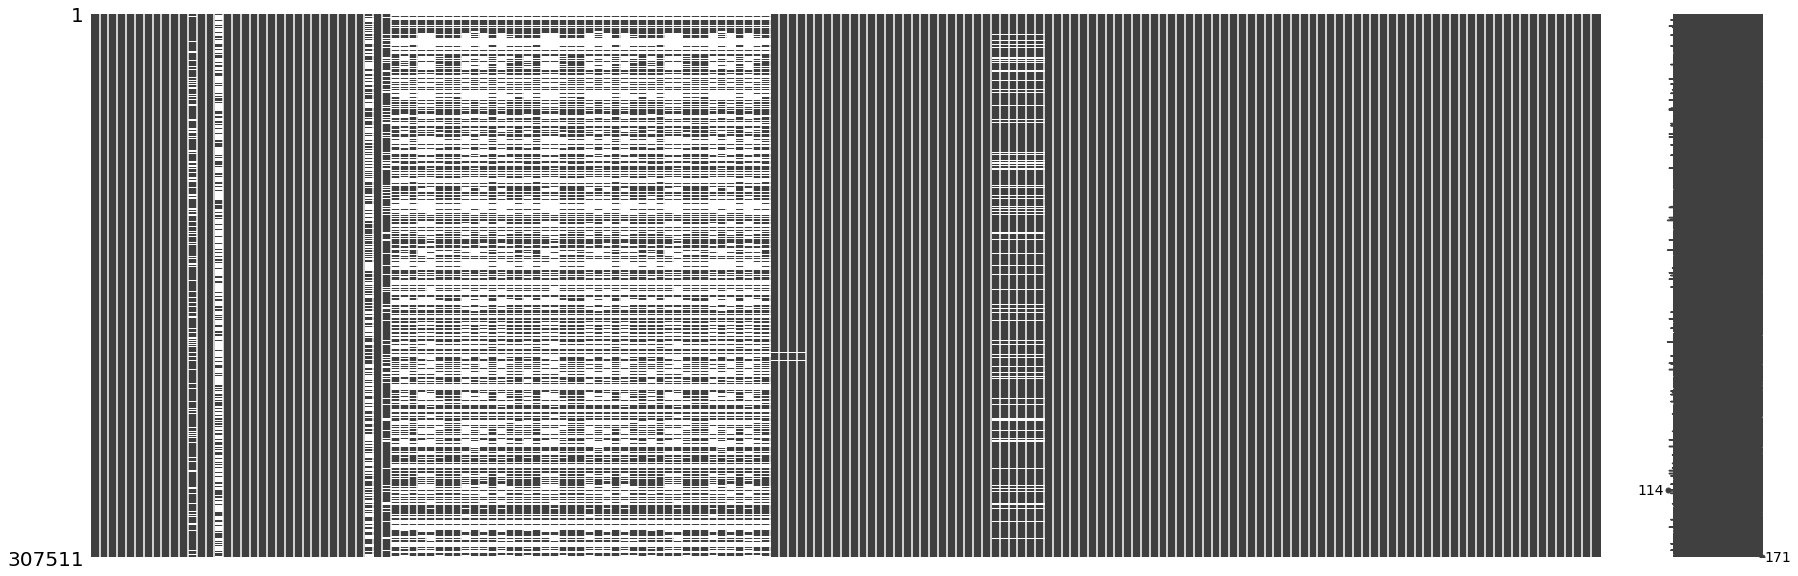

In [43]:
# Plot graphic of missing values
import missingno
missingno.matrix(app_train, figsize = (30,10))

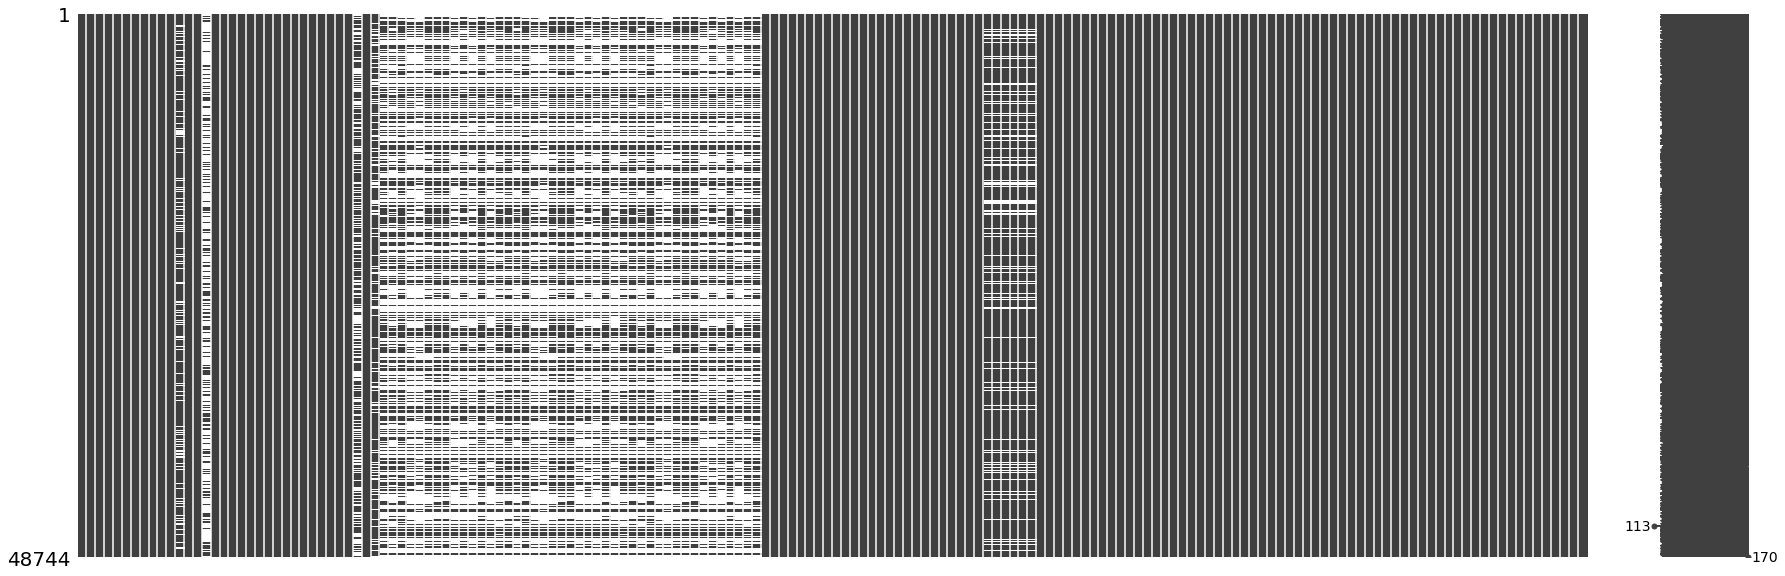

In [44]:
# checking for test set
missingno.matrix(app_test, figsize = (30,10))

Visual matrix are mostly useful, but we cannot get much information. We certainly can see there are white dots signifying that there are missing points. But what are they?

In [45]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [46]:
missing_values = find_missing_values(app_train, columns=app_train.columns)
missing_values

Number of missing or NaN values for each column:


{'SK_ID_CURR': 0,
 'NAME_CONTRACT_TYPE': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 0,
 'AMT_CREDIT': 0,
 'AMT_ANNUITY': 12,
 'AMT_GOODS_PRICE': 278,
 'REGION_POPULATION_RELATIVE': 0,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 55374,
 'DAYS_REGISTRATION': 0,
 'DAYS_ID_PUBLISH': 0,
 'OWN_CAR_AGE': 202929,
 'FLAG_MOBIL': 0,
 'FLAG_EMP_PHONE': 0,
 'FLAG_WORK_PHONE': 0,
 'FLAG_CONT_MOBILE': 0,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 0,
 'CNT_FAM_MEMBERS': 2,
 'REGION_RATING_CLIENT': 0,
 'REGION_RATING_CLIENT_W_CITY': 0,
 'HOUR_APPR_PROCESS_START': 0,
 'REG_REGION_NOT_LIVE_REGION': 0,
 'REG_REGION_NOT_WORK_REGION': 0,
 'LIVE_REGION_NOT_WORK_REGION': 0,
 'REG_CITY_NOT_LIVE_CITY': 0,
 'REG_CITY_NOT_WORK_CITY': 0,
 'LIVE_CITY_NOT_WORK_CITY': 0,
 'EXT_SOURCE_1': 173378,
 'EXT_SOURCE_2': 660,
 'EXT_SOURCE_3': 60965,
 'APARTMENTS_AVG': 156061,
 'BASEMENTAREA_AVG': 179943,
 'YEARS_BEGINEXPLUATATION_AVG': 150007,
 'YEARS_BUILD_AVG': 204488,
 'COMMONAREA_AVG': 214865,
 

In [47]:
missing_values = find_missing_values(app_test, columns=app_test.columns)
missing_values

Number of missing or NaN values for each column:


{'SK_ID_CURR': 0,
 'NAME_CONTRACT_TYPE': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 0,
 'AMT_CREDIT': 0,
 'AMT_ANNUITY': 24,
 'AMT_GOODS_PRICE': 0,
 'REGION_POPULATION_RELATIVE': 0,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 9274,
 'DAYS_REGISTRATION': 0,
 'DAYS_ID_PUBLISH': 0,
 'OWN_CAR_AGE': 32312,
 'FLAG_MOBIL': 0,
 'FLAG_EMP_PHONE': 0,
 'FLAG_WORK_PHONE': 0,
 'FLAG_CONT_MOBILE': 0,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 0,
 'CNT_FAM_MEMBERS': 0,
 'REGION_RATING_CLIENT': 0,
 'REGION_RATING_CLIENT_W_CITY': 0,
 'HOUR_APPR_PROCESS_START': 0,
 'REG_REGION_NOT_LIVE_REGION': 0,
 'REG_REGION_NOT_WORK_REGION': 0,
 'LIVE_REGION_NOT_WORK_REGION': 0,
 'REG_CITY_NOT_LIVE_CITY': 0,
 'REG_CITY_NOT_WORK_CITY': 0,
 'LIVE_CITY_NOT_WORK_CITY': 0,
 'EXT_SOURCE_1': 20532,
 'EXT_SOURCE_2': 8,
 'EXT_SOURCE_3': 8668,
 'APARTMENTS_AVG': 23887,
 'BASEMENTAREA_AVG': 27641,
 'YEARS_BEGINEXPLUATATION_AVG': 22856,
 'YEARS_BUILD_AVG': 31818,
 'COMMONAREA_AVG': 33495,
 'ELEVATORS_AV

In [48]:
app_train.isnull().sum()

SK_ID_CURR                                       0
NAME_CONTRACT_TYPE                               0
FLAG_OWN_CAR                                     0
FLAG_OWN_REALTY                                  0
CNT_CHILDREN                                     0
AMT_INCOME_TOTAL                                 0
AMT_CREDIT                                       0
AMT_ANNUITY                                     12
AMT_GOODS_PRICE                                278
REGION_POPULATION_RELATIVE                       0
DAYS_BIRTH                                       0
DAYS_EMPLOYED                                55374
DAYS_REGISTRATION                                0
DAYS_ID_PUBLISH                                  0
OWN_CAR_AGE                                 202929
FLAG_MOBIL                                       0
FLAG_EMP_PHONE                                   0
FLAG_WORK_PHONE                                  0
FLAG_CONT_MOBILE                                 0
FLAG_PHONE                     

In [49]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [50]:
summary_missing(app_train)

No. of fields:  307511
No. of missing fields:  59


,No. of mising Value,%age of missing Value
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FLOORSMIN_MEDI,208642,67.8


In [51]:
summary_missing(app_test)

No. of fields:  48744
No. of missing fields:  57


,No. of mising Value,%age of missing Value
COMMONAREA_AVG,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_MODE,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
LIVINGAPARTMENTS_AVG,32780,67.2
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
FLOORSMIN_AVG,32466,66.6


**Clearly we have serious issue of missing values in both test and train dataset, we need to solve it. We will first show all possible issues in our dataset and then we will solve them one by one.**

### Treating missing values

In [52]:
TARGET = app_train['TARGET'] # Acts as dependant variable i.e y

In [53]:
from sklearn.preprocessing import Imputer


    
# Assign train and test to app_train and app_test; train and test are used to scale data

train=app_train.drop("TARGET", axis=1)
test = app_test

# Initialize in compute method according to the average method

inputer = Imputer(strategy = 'mean')
inputer.fit(train)

# Enter NA values as average
train = inputer.transform(train)
test = inputer.transform(test)

In [54]:
train.shape

(307511, 170)

In [55]:
test.shape

(48744, 170)

# 3) Normalize/Scale data

In [56]:
# Initialize the scaler with the MinMaxScaler method in the range [-1, 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1, 1))
scaler.fit(train)

# Scale data on train and test
train = scaler.transform(train)
test = scaler.transform(test)

In [57]:
# Remove the first column SK_ID_CURR because this column is a key. When needed to get from app_train and app_test
train = train[:, 1:]
test = test[:, 1:]

In [58]:
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (307511, 169)
test shape:  (48744, 169)


# 6-Model

Finding out the Repaid / Not Repaid ratio distribution of numeric variables, logistic model seems to be obvious choice

## a-Logistic regression

In [59]:
#logreg = LogisticRegression()
#logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#acc_log

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, TARGET)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [61]:
acc_log = round(log_reg.score(train, TARGET) * 100, 2)
acc_log

91.93

In [62]:
TARGET.value_counts()/TARGET.value_counts().sum()

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Clearly, our data has more values for those customers who would return loans rapidly. As we are more interested in those who have difficulty in returning loans i.eclass 1. We need to focus on class 1.

**Accuracy proved to be ineffective in the case of such serious imbalance. In this case the forecasted results of the model are often biased toward a majority class. Therefore Accuracy is obviously high(91.9) for poor quality models because the number of good case records is too much leading to a sensory model that determines the whole is good records also lead to big Accuracy. An inexperienced modeler will be very happy with this result. If applying such models, it will significantly affect financial and business organizations**

### Applying Recall and Precision to evaluate the model

In [63]:
log_reg.predict_proba(train)[0:10, :]

array([[0.77970964, 0.22029036],
       [0.9655655 , 0.0344345 ],
       [0.9265343 , 0.0734657 ],
       [0.90223254, 0.09776746],
       [0.90111072, 0.09888928],
       [0.89658779, 0.10341221],
       [0.96413942, 0.03586058],
       [0.93784411, 0.06215589],
       [0.93222529, 0.06777471],
       [0.92818409, 0.07181591]])

**It shows prob for class 0 i.e  "Loan payers" and class 1 i.e "Loan defaulters". We are interested in class1 so, we will proceed with that.**

In [64]:
# print the first 10 predicted probabilities for class 1
log_reg.predict_proba(train)[0:10, 1]

array([0.22029036, 0.0344345 , 0.0734657 , 0.09776746, 0.09888928,
       0.10341221, 0.03586058, 0.06215589, 0.06777471, 0.07181591])

In [65]:
# store the predicted probabilities for class 1
train_pred_prob = log_reg.predict_proba(train)[:, 1]

In [66]:
train_pred_prob.shape

(307511,)

In [67]:
TARGET.shape

(307511,)

In [68]:
#plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'Frequency')

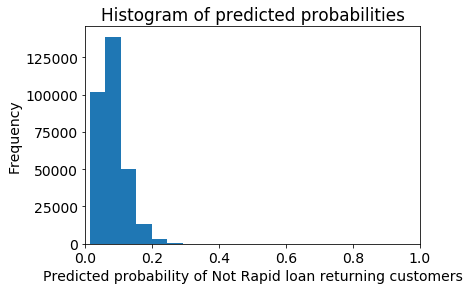

In [69]:
# histogram of predicted probabilities
plt.hist(train_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Not Rapid loan returning customers')
plt.ylabel('Frequency')

**As our data is biased towards class 0 so, we could not get enough values of class 1. Due to that, we do not have a great prediction possibilities for class 1 i.e  Loan defaulters.**<br>

when we get into problems with inbalanced classes (we will see this is the case), accuracy is not the best metric. That's why we better use ROC AUC 

## ROC curve
ROC is in fact a visual chart that evaluates the quality of the model. The more ROC protrudes, the better the classification is and the contrary. The convex level of the ROC curve is measured by the area under the ROC curve and the horizontal axis, also known as the AUC (Area under curve).

**see how sensitivity and specificity are affected by various thresholds**

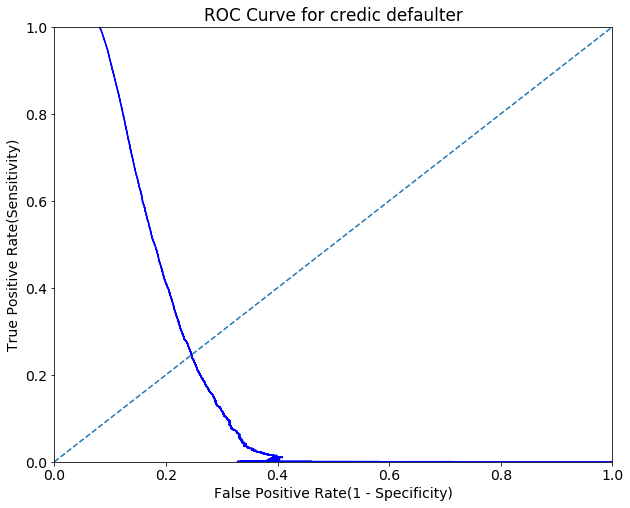

In [70]:
from sklearn.metrics import roc_curve, precision_recall_curve
fpr, tpr, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_roc_curve(fpr, tpr, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1 - Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Curve for credic defaulter')

_plot_roc_curve(fpr, tpr, thres)

Precision and Recall are other two alternatives.Both measure the level of accurate forecasting.<br>
Precision evaluates the exact forecast rate of bad records in the total number of cases that are forecasted to be bad.
Recall evaluates the exact bad profile forecast rate when the profile is essentially bad.
Besides, there are other indicators we can consider like F1-Score, Kappa, Gini.

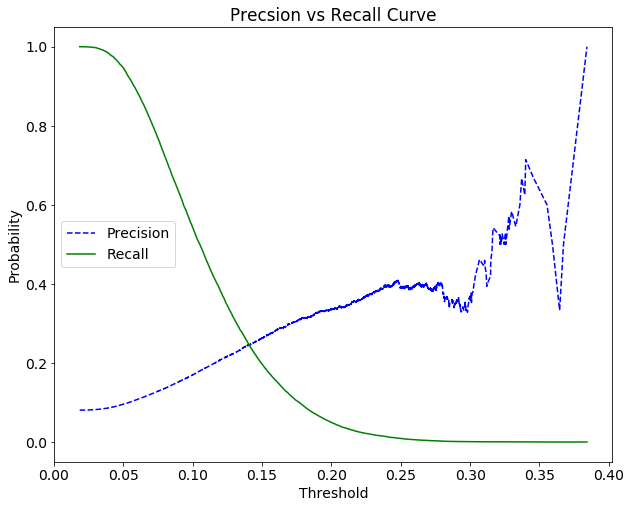

In [71]:
from sklearn.metrics import precision_recall_curve
prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(prec, rec, thres)

The non-protruding ROC curve above the horizontal axis indicates the classification power of the relatively weak model. The ratio of precision and recall to threshold thresholds is also not convex curves that lead to a change in threshold that can increase the trade-off between significant precision and recall rates. At each level threshold does not achieve simultaneous high precision and recall rates. Instead, you'll have to trade between high precision or high recall. Hence, this is not a good enough model to apply in practice

### Using Feature engineering
In sklearn we can easily use PolynormialFeatures. For domain knowledge feature engineering, we need a better know how insurance sector. Perhaps other related .csv files might help us. In this notebook, we would only concentrate on main .csv files though

In [72]:
# Working on correlation that we have already done
corr_tbl_train = app_train.corr()
corr_tbl_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
SK_ID_CURR,1.000000,0.001654,0.001216,0.000703,-0.001129,0.001241,-0.000640,0.000158,-0.000400,0.000849,...,0.002073,-0.000976,0.000072,-0.001396,0.002300,-0.001281,-0.000270,0.000510,0.002549,-0.002108
NAME_CONTRACT_TYPE,0.001654,1.000000,0.004022,0.067177,0.029998,-0.011148,-0.226592,-0.256037,-0.190742,0.026867,...,0.006874,0.003783,0.010609,0.001571,0.011120,0.015098,0.000040,0.027372,-0.000339,-0.030896
FLAG_OWN_CAR,0.001216,0.004022,1.000000,-0.002817,0.102023,0.211926,0.116047,0.144151,0.120201,0.041314,...,-0.005064,0.000727,0.011128,-0.002715,-0.009758,-0.025584,-0.009212,-0.034754,-0.007584,-0.021851
FLAG_OWN_REALTY,0.000703,0.067177,-0.002817,1.000000,-0.002366,0.005513,-0.037374,-0.005426,-0.043385,0.015175,...,0.000679,0.002567,0.000833,0.000757,0.014874,0.017445,-0.014577,0.022013,-0.008535,-0.006148
CNT_CHILDREN,-0.001129,0.029998,0.102023,-0.002366,1.000000,0.028804,0.002176,0.021989,-0.001818,-0.025573,...,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-0.025088,0.011036,-0.038644,0.004525,0.019187
AMT_INCOME_TOTAL,0.001241,-0.011148,0.211926,0.005513,0.028804,1.000000,0.391366,0.467469,0.397909,0.192516,...,0.031085,0.016000,0.059624,0.010309,0.086771,0.034721,-0.008373,0.125421,-0.006935,-0.023080
AMT_CREDIT,-0.000640,-0.226592,0.116047,-0.037374,0.002176,0.391366,1.000000,0.787336,0.986930,0.097395,...,0.013845,0.007781,0.026075,0.005733,0.046243,0.009076,-0.007031,0.057087,-0.003980,-0.029956
AMT_ANNUITY,0.000158,-0.256037,0.144151,-0.005426,0.021989,0.467469,0.787336,1.000000,0.790757,0.117087,...,0.015337,0.009319,0.033467,0.006309,0.055625,0.008508,-0.007217,0.067956,-0.003799,-0.011050
AMT_GOODS_PRICE,-0.000400,-0.190742,0.120201,-0.043385,-0.001818,0.397909,0.986930,0.790757,1.000000,0.101775,...,0.013185,0.009638,0.027016,0.005886,0.049470,0.012039,-0.008896,0.061621,-0.004531,-0.039445
REGION_POPULATION_RELATIVE,0.000849,0.026867,0.041314,0.015175,-0.025573,0.192516,0.097395,0.117087,0.101775,1.000000,...,0.078062,0.016288,0.045775,0.013435,0.092652,0.010782,-0.056263,0.103513,-0.029932,-0.037227


In [73]:
# Get a list of the 15 variables that are most correlated to turn the absolute value.
cols_corr_15 = np.abs(corr_tbl_train['TARGET']).sort_values()[-16:].index.tolist()

In [75]:
print(cols_corr_15)

['CODE_GENDER_F', 'CODE_GENDER_M', 'DAYS_LAST_PHONE_CHANGE', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_2', 'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_0', 'OCCUPATION_TYPE_OCCUPATION_TYPE_1', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']


In [74]:
from sklearn.preprocessing import PolynomialFeatures, Imputer, MinMaxScaler

# Initialize preprocessing. Inputer according to mean, minmax scaler in range 0, 1 and polynomial features level 3
inputer = Imputer(strategy = 'mean')
minmax_scaler = MinMaxScaler(feature_range = (0, 1))
poly_engineer = PolynomialFeatures(degree = 3)

In [76]:
# Get the features that are most correlated to the target variable from app_train and app_test
TARGET = app_train[cols_corr_15[-1]]
train_poly_fea = app_train[cols_corr_15[:-1]]
test_poly_fea = app_test[cols_corr_15[:-1]]

In [77]:
# imput missing data
imputer = inputer.fit(train_poly_fea)
train_poly_fea = imputer.transform(train_poly_fea)
test_poly_fea = imputer.transform(test_poly_fea)

In [78]:
# Minmax data scaler
minmax_scaler = minmax_scaler.fit(train_poly_fea)
train_poly_fea = minmax_scaler.transform(train_poly_fea)
test_poly_fea = minmax_scaler.transform(test_poly_fea)

In [79]:
print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

train_poly_fea shape:  (307511, 15)
test_poly_fea shape:  (48744, 15)


In [80]:
# Polynomial features data
poly_engineer = poly_engineer.fit(train_poly_fea)
train_poly_fea = poly_engineer.transform(train_poly_fea)
test_poly_fea = poly_engineer.transform(test_poly_fea)

In [81]:
print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

train_poly_fea shape:  (307511, 816)
test_poly_fea shape:  (48744, 816)


**After the feature engineering, the number of variables has increased from 15 to 816 variables**

In [82]:
features = poly_engineer.get_feature_names(input_features = cols_corr_15[:-1])
features[:10]

['1',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_INCOME_TYPE_Working',
 'REGION_RATING_CLIENT',
 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_2',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_0']

To assess whether after implementing features engineering helps improve results, we do logistic regression according to new features.

## Logistic Regression Model-NEW

In [83]:
from sklearn.linear_model import LogisticRegression

# Build logistic regression model with control parameter C = 0.0001
lg_reg = LogisticRegression(C = 0.0001)
lg_reg.fit(train_poly_fea, TARGET)
lg_reg

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Accuracy

In [97]:
train_pred_label = lg_reg.predict(train_poly_fea)
accuracy_score(TARGET, train_pred_label)

0.9192744324593266

### confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have bad credit), and actually they do have the bad credits.<br>
true negatives (TN): We predicted good credits,actually they don't have bad credit.<br>
false positives (FP): We predicted bad crditors, but actually they have actually good creditors. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted good creditors, but they actually have bad credits. (Also known as a "Type II error.")<br>

In [102]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(TARGET, train_pred_label)
cm

array([[282679,      7],
       [ 24817,      8]], dtype=int64)

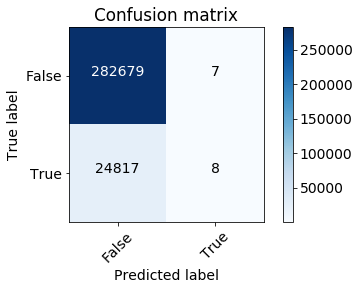

In [103]:
# False=0; True=1
plot_confusion_matrix(cm, classes=['False', 'True'])

**We have 282679 values where our model predicted good loan payers and they turned out to be good.So good job!<br>
We have 24817 values where our model predicted good loan payers and they were actually bad. That's really uncool.<br>
We have 7 values where our model predicted bad credit payers. Actually those poor guys were good payers. Sorry ! <br>
We have only 8 values where we predicted bad and they actually were bad. <br>**

Note<br>

- We can imagine that our model looks very accurate. But we only made 8 right predictions regarding bad creditors.<br>
- We left out huge amount of bad creditors i.e 24817. In real world, that is really bad. But, we can show to our customer that we have higher accuracy and what models we used. And how much effort we made in cleaning data etc etc. It won't be accepted <br>
- Another issue with accuracy is that our model only got very few bad creditor history. So we need to focus more on those fewer values than those good credit values. Hence, we need to check True positive and False negative results seriously.<br>
- Note that we are falsely predicting few good guys. But, they are so small in number that we do not need to worry. Those who are actually bad is our concern and our prediction should get better results there.<br>


**That's why we can conclude that accuracy in this problem is not the best identifier of good model**

In [86]:
#clf.predict_proba(X_test)[0:10, :]
lg_reg.predict_proba(train_poly_fea)[0:10, :]

array([[0.65709152, 0.34290848],
       [0.954708  , 0.045292  ],
       [0.94956279, 0.05043721],
       [0.94700377, 0.05299623],
       [0.89974939, 0.10025061],
       [0.88111074, 0.11888926],
       [0.97111092, 0.02888908],
       [0.96323847, 0.03676153],
       [0.94906683, 0.05093317],
       [0.95198022, 0.04801978]])

**We still find better predicted probabilities for class 0 i.e loan payers than class 1 i.e loan defaulters**

In [88]:
# Logistic probability prediction
train_pred_prob = lg_reg.predict_proba(train_poly_fea)[:, 1]
print(train_pred_prob)

[0.34290848 0.045292   0.05043721 ... 0.05456782 0.07354115 0.05770235]


Text(0, 0.5, 'Frequency')

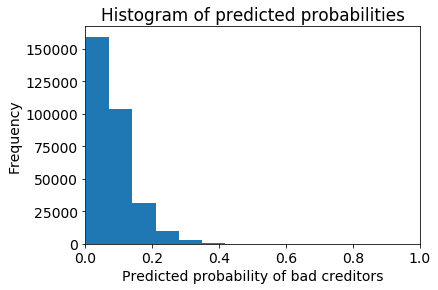

In [91]:
# histogram of predicted probabilities
plt.hist(train_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of bad creditors')
plt.ylabel('Frequency')

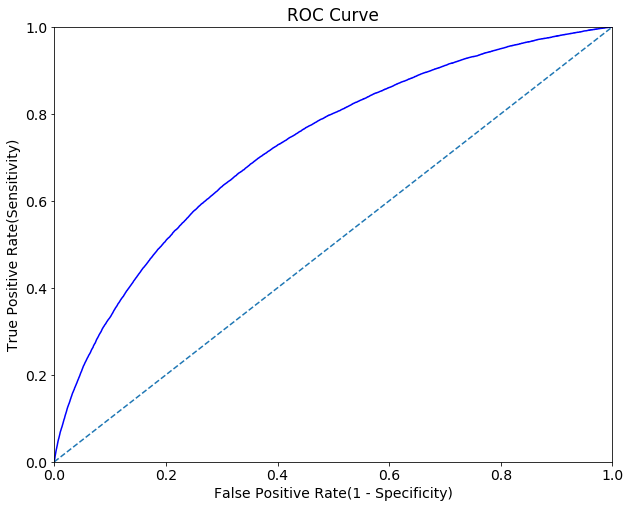

In [92]:
# Representing roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(TARGET, train_pred_prob)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1 - Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

**Compared to earlier case, ROC curves shows more convex feature. That shows the classification power of the model is better after the feature engineering.**

In [93]:
#AUC
from sklearn.metrics import auc
auc(fpr, tpr)

0.7253695594938039

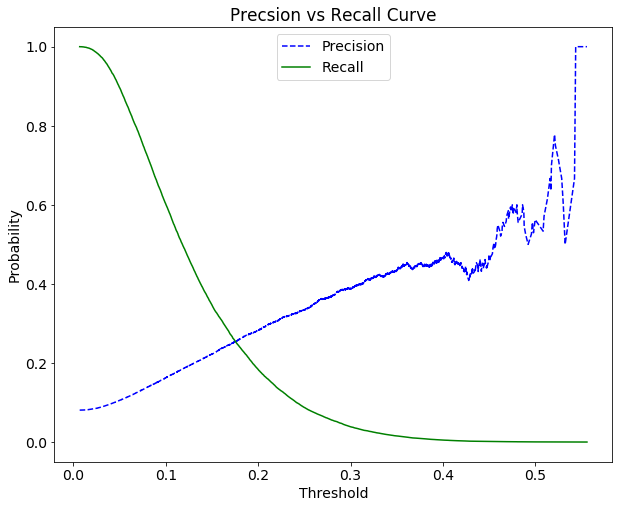

In [100]:
prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)

**We can see that at standard threshold point i.e 0.5, we can lower recall (sensitivity) value. Precision also fluctuates at this point. If we trace back then we may get a point somewhere (1.8). At this point , both values are interacting.To achieve a model with better sensitivity values (those prediction with bad loan creditors) , we got to work with lower threshold.**

In [114]:
from sklearn.metrics import classification_report
print(classification_report(TARGET, train_pred_label))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    282686
          1       0.53      0.00      0.00     24825

avg / total       0.89      0.92      0.88    307511



## b-Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

#create forest trees
rd_classifier = RandomForestClassifier(n_estimators = 100, 
                                       max_depth = 5, 
                                       random_state = 123, 
                                       verbose = 1,
                                       n_jobs = -1)

In [120]:
rd_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=123, verbose=1, warm_start=False)

In [121]:
# fitting model on feature engineered data
rd_classifier.fit (train_poly_fea, TARGET)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=123, verbose=1, warm_start=False)

In [122]:
# Predict on train practice
train_prob_rd = rd_classifier.predict_proba (train_poly_fea) [:, 1]

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.6s finished


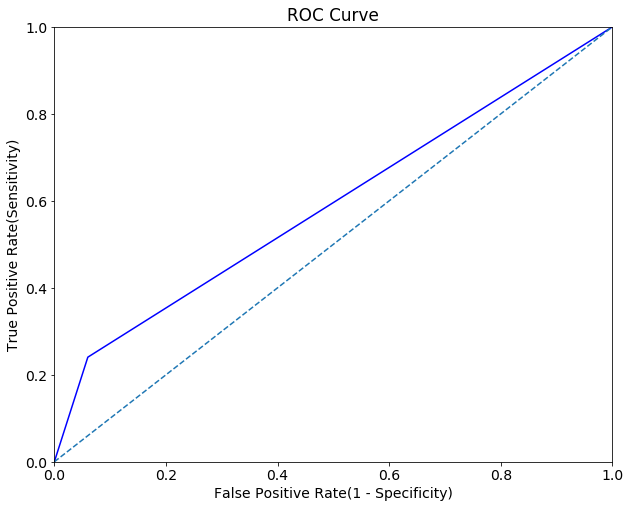

In [123]:
fpr2, tpr2, thres2 = roc_curve(TARGET, train_prob_rd)
p2 = _plot_roc_curve(fpr, tpr, thres)

### Logistic vs Random Forest

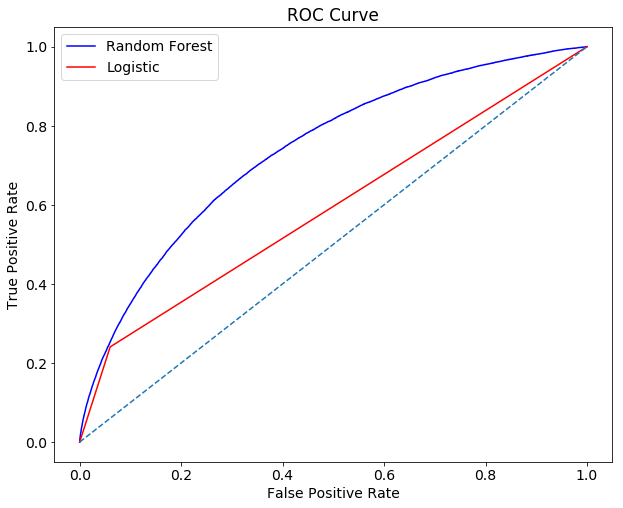

In [124]:
plt.figure(figsize = (10, 8))
plt.plot(fpr2, tpr2, 'b-', label = 'Random Forest')
plt.plot(fpr, tpr, 'r-', label = 'Logistic')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

**We find that Random Forest's ROC is more convex than Logistic. This shows that Random Forest's classification power is better than Logistic.**

In [125]:
from sklearn.metrics import auc
auc(fpr2, tpr2)

0.7371298246509517

### Precision diagrams and recall curve

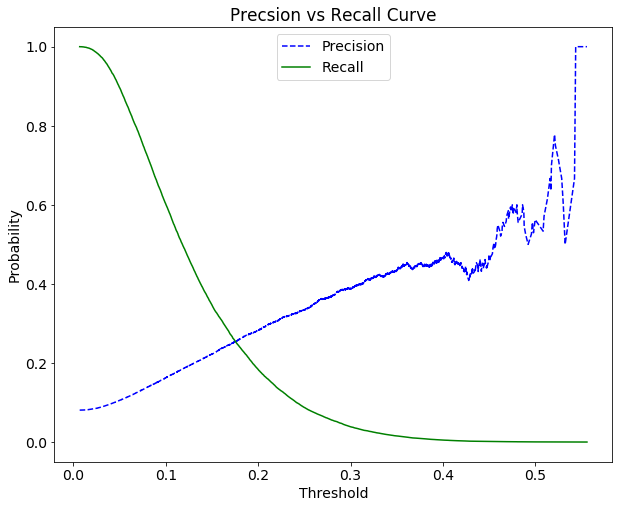

In [126]:
prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)
_plot_prec_rec_curve(prec, rec, thres)

In [127]:
#importance of variables affecting the target variable
feature_importance = rd_classifier.feature_importances_
feature_importance = pd.DataFrame ({'importance values': feature_importance})
feature_importance.index = features
feature_importance = feature_importance.sort_values ('importance values', ascending = False)
feature_importance [: 10]

,importance values
EXT_SOURCE_2 EXT_SOURCE_3,0.063954
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,0.050246
EXT_SOURCE_1 EXT_SOURCE_2,0.039775
DAYS_BIRTH EXT_SOURCE_2 EXT_SOURCE_3,0.037596
EXT_SOURCE_1 EXT_SOURCE_3,0.034832
EXT_SOURCE_2^2 EXT_SOURCE_3,0.033498
EXT_SOURCE_1^2 EXT_SOURCE_3,0.030027
EXT_SOURCE_2 EXT_SOURCE_3^2,0.028401
EXT_SOURCE_1 EXT_SOURCE_3^2,0.024767
DAYS_LAST_PHONE_CHANGE EXT_SOURCE_2 EXT_SOURCE_3,0.024304


Text(0.5, 0, 'Importance values')

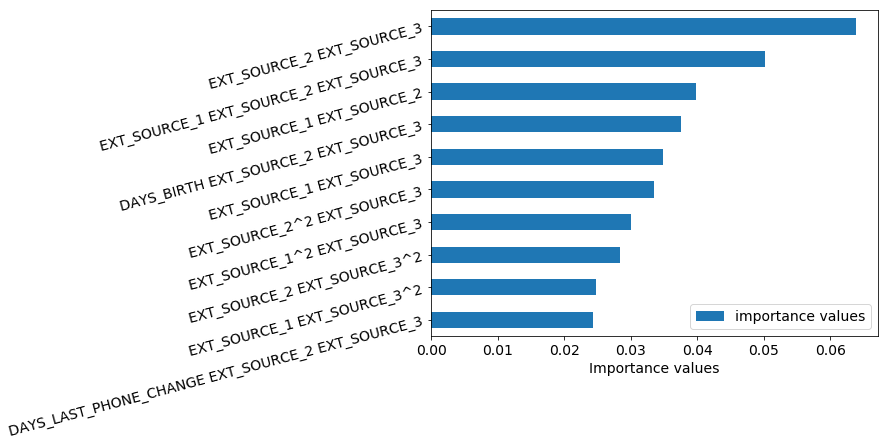

In [128]:
feature_importance[:10].sort_values('importance values', ascending = True).plot.barh(figsize = (8, 6))
plt.yticks(rotation = 15)
plt.xlabel('Importance values')

In [129]:
feature_importance.iloc[:5, 0].tolist()

[0.06395438116188307,
 0.05024627389171422,
 0.03977520195604132,
 0.03759625466325829,
 0.03483200581698116]

### Accuracy

In [130]:
from sklearn.metrics import accuracy_score
train_label_rd = rd_classifier.predict(train_poly_fea)
accuracy_score(train_label_rd, TARGET)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished


0.9192711805431351

In [131]:
np.unique(train_label_rd, return_counts = True)

(array([0], dtype=int64), array([307511], dtype=int64))

## c-Gradient Boosting

In [132]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [133]:
lgb_classifier = lgb.LGBMClassifier(n_estimator = 10000, 
                                    objective = 'binary', 
                                    class_weight = 'balanced',
                                    learning_rate = 0.05,
                                    reg_alpha = 0.1,
                                    reg_lambda = 0.1,
                                    subsample = 0.8,
                                    n_job = -1,
                                    random_state = 12
                                   )
lgb_classifier

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.05,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimator=10000, n_estimators=100, n_job=-1,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=12,
        reg_alpha=0.1, reg_lambda=0.1, silent=True, subsample=0.8,
        subsample_for_bin=200000, subsample_freq=0)

In [134]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 12)
valid_scores = []
train_scores = []
count = 0
for train_idx, valid_idx in kfold.split(train_poly_fea):
    count += 1
    # Split train, valid
    train_features, train_labels = train_poly_fea[train_idx], TARGET[train_idx]
    valid_features, valid_labels = train_poly_fea[valid_idx], TARGET[valid_idx]
    lgb_classifier.fit(train_features, train_labels, eval_metric = 'auc',
              eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
              eval_names = ['valid', 'train'], 
              early_stopping_rounds = 100, verbose = 200)
    
    valid_score = lgb_classifier.best_score_['valid']['auc'] 
    train_score = lgb_classifier.best_score_['train']['auc'] 
    
    valid_scores.append(valid_score)
    train_scores.append(train_score)
    
    print('fold time: {}; train score: {}; valid score: {}'.format(count, valid_score, train_score))

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[100]	train's binary_logloss: 0.578353	train's auc: 0.765275	valid's binary_logloss: 0.584311	valid's auc: 0.743561
fold time: 1; train score: 0.7435612802818701; valid score: 0.7652748453478808
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[100]	train's binary_logloss: 0.578897	train's auc: 0.764964	valid's binary_logloss: 0.58559	valid's auc: 0.745841
fold time: 2; train score: 0.7458405529317079; valid score: 0.7649637916613917
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[100]	train's binary_logloss: 0.578466	train's auc: 0.765469	valid's binary_logloss: 0.585564	valid's auc: 0.744845
fold time: 3; train score: 0.7448448332595007; valid score: 0.7654692177054141
Training until validation scores don't improve for 100 rounds.
Did not meet early s

## d-Neural network

In [ ]:
from keras.layers import Input, Dense, Flatten, Concatenate, concatenate, Dropout, Lambda
from keras.models import Model
from keras.layers.embeddings import Embedding

In [ ]:
train.shape

In [ ]:
# design neural network
input_els = []
encode_els = []

# Generate a list include many Input layers

for i in range(train.shape[1]):
    # input alway have the shape (*, 1)
    input_els.append(Input(shape = (1,)))
    encode_els.append(input_els[-1])
# encode_els

In [ ]:
# concatenate all layers
encode_els = concatenate(encode_els) 

# After completed the input layers, we design the hidden layers
hidden1 = Dense(units = 128, kernel_initializer = 'normal', activation = 'relu')(encode_els)
droplayer1 = Dropout(0.2)(hidden1)
hidden2 = Dense(64, kernel_initializer = 'normal', activation = 'relu')(droplayer1)
droplayer2 = Dropout(0.2)(hidden2)
outputlayer = Dense(1, kernel_initializer = 'normal', activation = 'sigmoid')(droplayer2)

classifier = Model(input = input_els, outputs = [outputlayer])

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

In [ ]:
from sklearn.model_selection import KFold
count = 0
kfold = KFold(n_splits = 10, shuffle = True, random_state = 12)
valid_scores = []
train_scores = []
for train_idx, valid_idx in kfold.split(train_poly_fea):
    while count < 1:
        count += 1
        # Split train, valid
        train_features, train_labels = train[train_idx], TARGET[train_idx]
        valid_features, valid_labels = train[valid_idx], TARGET[valid_idx]
        classifier.fit(
            [train_features[:, i] for i in range(train.shape[1])], #lấy list toàn bộ các cột
            train_labels,
            epochs=1,
            batch_size=128,
            shuffle=True,
            validation_data=([valid_features[:, i] for i in range(train.shape[1])], valid_labels) 
        )

In [ ]:
#FORECAST ON TRAINING data

In [ ]:
train_prob_nn = classifier.predict([train[:, i] for i in range(train.shape[1])])
train_prob_nn

In [ ]:
fpr4, tpr4, thres4 = roc_curve(TARGET, train_prob_nn)
_plot_roc_curve(fpr4, tpr4, thres4)

In [ ]:
from sklearn.metrics import auc
auc(fpr4, tpr4)

In [ ]:
prec, rec, thres = precision_recall_curve(TARGET, train_prob_nn)
_plot_prec_rec_curve(prec, rec, thres)